# Introduction to Web2Vec: Website to vector representation library
Web2Vec is a comprehensive library designed to convert websites into vector parameters. It provides ready-to-use implementations of web crawlers using Scrapy, making it accessible for less experienced researchers. This tool is invaluable for website analysis tasks, including SEO, disinformation detection, and phishing identification.


The goal of Web2Vec is to offer a comprehensive repository for implementing a broad spectrum of website processing-related methods. Many available tools exist, but learning and using them can be time-consuming. Moreover, new features are continually being introduced, making it difficult to keep up with the latest techniques. Web2Vec aims to bridge this gap by providing a complete solution for website analysis. This repository facilitates the collection and analysis of extensive information about websites, supporting both academic research and industry applications.

## Table of Contents

### 1. [Installation](#Installation)
### 2. [Usage](#Usage)
### 3. [Conclusion](#Conclusion)


## Installation
To install web2vec, you can use pip:


In [1]:
!pip install web2vec

  Obtaining dependency information for web2vec from https://files.pythonhosted.org/packages/a3/e7/4906ecfd3077e585a00fc21b08450bc306c48be3108d77bd9e200b8eeef6/web2vec-0.1.0-py3-none-any.whl.metadata

[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


## Usage
To use web2vec, please configure it to know where data is stored or which api key is used. You can do it with environmental variables, .env file or directly in code.


In [8]:
import os

current_directory = os.getcwd()
output_directory = os.path.join(current_directory, 'output')

os.environ['WEB2VEC_DEFAULT_OUTPUT_PATH'] = output_directory
os.environ['WEB2VEC_OPEN_PAGE_RANK_API_KEY'] = ''


### Crawling websites
Library provides easy way to crawl websites using scrapy, you can use it by providing list of urls to crawl and domains to limit crawling.

In [7]:
import web2vec as w2v
from scrapy.crawler import CrawlerProcess
process = CrawlerProcess(
    settings={
        "FEEDS": {
            os.path.join(w2v.config.crawler_output_path, "output.json"): {
                "format": "json",
                "encoding": "utf8",
            }
        },
        "DEPTH_LIMIT": 1,
        "LOG_LEVEL": "INFO",
    }
)

process.crawl(
    w2v.Web2VecSpider,
    start_urls=["http://quotes.toscrape.com/"], # pages to process
    allowed_domains=["quotes.toscrape.com"], # domains to process for links
    extractors=w2v.ALL_EXTRACTORS, # extractors to use
)
process.start()


2024-07-23 15:58:25 [scrapy.utils.log] INFO: Scrapy 2.11.2 started (bot: scrapybot)
2024-07-23 15:58:25 [scrapy.utils.log] INFO: Versions: lxml 5.2.2.0, libxml2 2.12.6, cssselect 1.2.0, parsel 1.9.1, w3lib 2.2.1, Twisted 24.3.0, Python 3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0], pyOpenSSL 24.2.1 (OpenSSL 3.3.1 4 Jun 2024), cryptography 43.0.0, Platform Linux-6.5.0-44-generic-x86_64-with-glibc2.35
2024-07-23 15:58:25 [scrapy.addons] INFO: Enabled addons:
[]
2024-07-23 15:58:25 [py.warnings] WARNING: /home/dfraszczak/PycharmProjects/web2vec/.venv/lib/python3.10/site-packages/scrapy/utils/request.py:254: ScrapyDeprecationWarning: '2.6' is a deprecated value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting.

It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reasons, but it will change in a future version of Scrapy.

See the

ReactorNotRestartable: 

## Visualizing website connections and doing network analysis
Library provides method to generate NetworkX network based on crawled data. You can use it to visualize connections between websites and do network analysis.

Below script shows two images: network visualization and table with nodes sorted descending by degree centrality.


In [10]:
import networkx as nx
from matplotlib import pyplot as plt

def visualize_graph_with_centrality(graph: nx.Graph):
    """Visualize the graph of web pages with centrality."""
    degree_centrality = nx.degree_centrality(graph)

    sorted_nodes = sorted(
        degree_centrality.items(), key=lambda item: item[1], reverse=True
    )

    table_data = [["Node", "Degree Centrality"]]
    for node, centrality in sorted_nodes[:20]:
        table_data.append([str(node), f"{centrality:.4f}"])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))

    pos = nx.spring_layout(graph)
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_size=50,
        node_color="skyblue",
        font_size=8,
        font_weight="bold",
        edge_color="gray",
        ax=ax1,
    )
    ax1.set_title("Graph of Web Pages")

    ax2.axis("off")
    table = ax2.table(cellText=table_data, cellLoc="center", loc="center")
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.5, 1.5)
    ax2.set_title("Top 10 Degree Centrality of Nodes")

    plt.show()

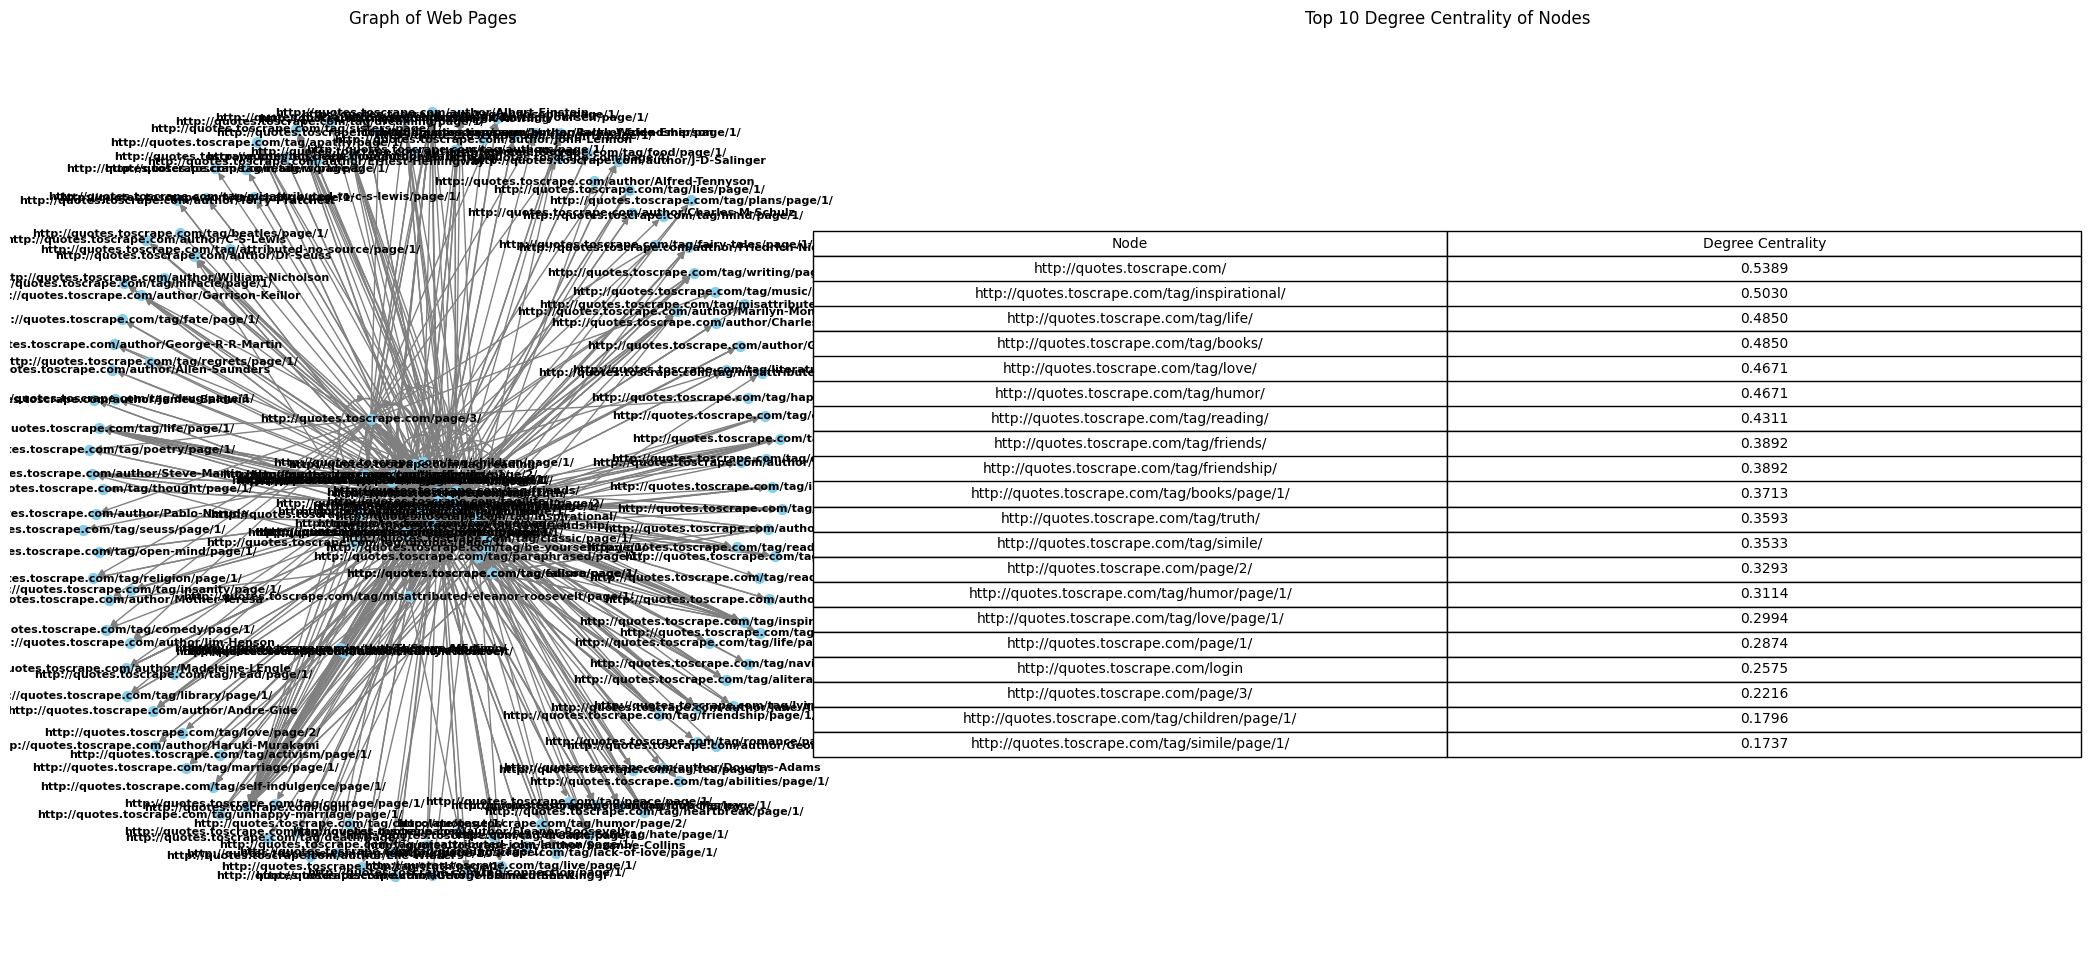

In [11]:
G = w2v.build_graph(w2v.config.crawler_output_path, allowed_domains=["quotes.toscrape.com"])
visualize_graph_with_centrality(G)

## Manual Website data analysis

By default, all website related parameters are extracted by extractors doing crawling but you can also use them manually.


### DNS features

In [13]:
url = "https://www.example.com"
domain = w2v.get_domain_from_url(url)
result = w2v.get_dns_features(domain)
print(result)

2024-07-23 16:08:34 [web2vec.extractors.dns_features] WARNING: No MX record found for www.example.com
2024-07-23 16:08:34 [web2vec.extractors.dns_features] WARNING: No NS record found for www.example.com
2024-07-23 16:08:34 [web2vec.extractors.dns_features] WARNING: No CNAME record found for www.example.com


DNSFeatures(domain='www.example.com', records=[DNSRecordFeatures(record_type='A', ttl=1697, values=['93.184.215.14']), DNSRecordFeatures(record_type='AAAA', ttl=734, values=['2606:2800:21f:cb07:6820:80da:af6b:8b2c']), DNSRecordFeatures(record_type='TXT', ttl=3600, values=['"wgyf8z8cgvm2qmxpnbnldrcltvk4xqfn"', '"v=spf1 -all"'])])


### HTML Body features

In [14]:
import requests

url = "https://www.example.com"
response = requests.get(url, allow_redirects=True, timeout=60)

html_body_features = w2v.get_html_body_features(response.text, response.url)

print(html_body_features)

HtmlBodyFeatures(contains_forms=False, contains_obfuscated_scripts=False, contains_suspicious_keywords=False, body_length=220, num_titles=1, num_images=0, num_links=1, script_length=0, special_characters=5, script_to_special_chars_ratio=0.0, script_to_body_ratio=0.0, body_to_special_char_ratio=44.0, iframe_redirection=1, mouse_over_effect=0, right_click_disabled=1, num_scripts_http=0, num_styles_http=0, num_iframes_http=0, num_external_scripts=0, num_external_styles=0, num_external_iframes=0, num_meta_tags=3, num_forms=0, num_forms_post=0, num_forms_get=0, num_forms_external_action=0, num_hidden_elements=0, num_safe_anchors=0, num_media_http=0, num_media_external=0, num_email_forms=0, num_internal_links=0, favicon_url=None, logo_url=None, found_forms=[], found_images=[], found_anchors=[{'href': 'https://www.iana.org/domains/example'}], found_media=[], copyright=None)


### HTTP response features

In [15]:
url = "https://www.example.com"
features = w2v.get_http_response_features(url)
print(features)

HttpResponseFeatures(redirects=False, redirect_count=0, contains_forms=False, contains_obfuscated_scripts=False, contains_suspicious_keywords=False, uses_https=True, missing_x_frame_options=True, missing_x_xss_protection=True, missing_content_security_policy=True, missing_strict_transport_security=True, missing_x_content_type_options=True, is_live=True, server_version='ECAcc (dcd/7D4F)', body_length=220, num_titles=1, num_images=0, num_links=1, script_length=0, special_characters=5, script_to_special_chars_ratio=0.0, script_to_body_ratio=0.0, body_to_special_char_ratio=44.0)


### SSL certification features

In [16]:
hostname = "www.example.com"
cert_info = w2v.get_certificate_features(hostname)

print(f"Certificate for {hostname}")
print(f"Subject: {cert_info.subject}")
print(f"Issuer: {cert_info.issuer}")
print(f"Validity: {cert_info.validity_message}")
print(f"Trust: {cert_info.trust_message}")
print(f"Valid from {cert_info.not_before} to {cert_info.not_after}")

Certificate for www.example.com
Subject: ((('countryName', 'US'),), (('stateOrProvinceName', 'California'),), (('localityName', 'Los Angeles'),), (('organizationName', 'Internet\xa0Corporation\xa0for\xa0Assigned\xa0Names\xa0and\xa0Numbers'),), (('commonName', 'www.example.org'),))
Issuer: ((('countryName', 'US'),), (('organizationName', 'DigiCert Inc'),), (('commonName', 'DigiCert Global G2 TLS RSA SHA256 2020 CA1'),))
Validity: Certificate is valid
Trust: Certificate is signed by a trusted CA
Valid from 2024-01-30 00:00:00 to 2025-03-01 23:59:59


### URL geo features

In [17]:
url = "https://example.com"
info = w2v.get_url_geo_features(url)
print(info)

URLGeoFeatures(url='https://example.com', country_code='US', asn=15133)


### URL lexical features

In [18]:
url = "https://192.1.10.1/path/to/file.html?arg1=val1&arg2=val2"
features = w2v.get_url_lexical_features(url)
print(features)

URLLexicalFeatures(count_dot_url=4, count_dash_url=0, count_underscore_url=0, count_slash_url=5, count_question_url=1, count_equals_url=2, count_at_url=0, count_ampersand_url=1, count_exclamation_url=0, count_space_url=0, count_tilde_url=0, count_comma_url=0, count_plus_url=0, count_asterisk_url=0, count_hash_url=0, count_dollar_url=0, count_percent_url=0, url_length=56, tld_amount_url=0, count_dot_domain=3, count_dash_domain=0, count_underscore_domain=0, count_slash_domain=0, count_question_domain=0, count_equals_domain=0, count_at_domain=0, count_ampersand_domain=0, count_exclamation_domain=0, count_space_domain=0, count_tilde_domain=0, count_comma_domain=0, count_plus_domain=0, count_asterisk_domain=0, count_hash_domain=0, count_dollar_domain=0, count_percent_domain=0, domain_length=10, vowel_count_domain=0, domain_in_ip_format=True, domain_contains_keywords=False, count_dot_directory=0, count_dash_directory=0, count_underscore_directory=0, count_slash_directory=2, count_question_di

### WHOIS features

In [19]:
domain = "example.com"
whois_data = w2v.get_whois_features(domain)

if whois_data:
    print(whois_data)
else:
    print("Failed to retrieve WHOIS data.")

WhoisFeatures(domain_name=['EXAMPLE.COM'], registrar='RESERVED-Internet Assigned Numbers Authority', whois_server='whois.iana.org', referral_url=None, updated_date=datetime.datetime(2023, 8, 14, 7, 1, 38), creation_date=datetime.datetime(1995, 8, 14, 4, 0), expiration_date=datetime.datetime(2024, 8, 13, 4, 0), name_servers=['A.IANA-SERVERS.NET', 'B.IANA-SERVERS.NET'], status=['clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited'], emails=[None], dnssec='signedDelegation', name=None, org=None, address=None, city=None, state=None, zipcode=None, country=None, raw={'domain': 'example.com', 'text': '   Domain Name: EXAMPLE.COM\r\n   Registry Domain ID: 2336799_DOMAIN_COM-VRSN\r\n   Registrar WHOIS Server: whois.iana.org\r\n   Registrar URL: http://res-dom.iana.org\r\n   Updated Date: 2023-08-14T07:01:38Z\r\n   Creation Date: 1995-0

### Google index

In [20]:
url = "wp.pl"
result = w2v.get_google_index_features(url)
if result.is_indexed is None:
    print(f"Error checking {url}.")
else:
    print(f"Is {url} indexed by Google? {'Yes' if result.is_indexed else 'No'}")
    if result.is_indexed:
        print(f"Position in search results: {result.position}")

2024-07-23 16:15:09 [WDM] INFO: ====== WebDriver manager ======
2024-07-23 16:15:09 [WDM] INFO: Get LATEST chromedriver version for google-chrome
2024-07-23 16:15:09 [WDM] INFO: Get LATEST chromedriver version for google-chrome
2024-07-23 16:15:09 [WDM] INFO: Driver [/home/dfraszczak/.wdm/drivers/chromedriver/linux64/125.0.6422.141/chromedriver-linux64/chromedriver] found in cache


Is wp.pl indexed by Google? Yes
Position in search results: 1


### Open Page Rank

In [ ]:
domain = "wp.pl"
page_rank_data = w2v.get_open_page_rank_features(domain)

if page_rank_data:
    print(f"Domain: {page_rank_data.domain}")
    print(f"PageRank: {page_rank_data.page_rank_decimal}")
    print(f"Updated Date: {page_rank_data.updated_date}")
else:
    print("Failed to retrieve PageRank data.")


### OpenPhish features

In [21]:
url = "http://www.example.com"
result = w2v.get_open_phish_features(url)
print(f"{url} is phishing: {result.is_phishing}")

http://www.example.com is phishing: False


### PhishTank features

In [22]:
domain = "allegrolokalnie.kategorie-baseny93.pl"
entry = w2v.get_phishtank_features_cached(domain)
print(f"{domain} is phishing: {entry}")

allegrolokalnie.kategorie-baseny93.pl is phishing: PhishTankFeatures(phish_id=8656332, url='http://allegrolokalnie.kategorie-baseny93.pl', phish_detail_url='http://www.phishtank.com/phish_detail.php?phish_id=8656332', submission_time='2024-07-15T01:06:22+00:00', verified='yes', verification_time='2024-07-15T01:09:57+00:00', online='yes', target='Allegro')


### SimilarWeb features

In [23]:
domain_to_check = "down.pcclear.com"
entry = w2v.get_similar_web_features(domain_to_check)
print(entry)

SimilarWebFeatures(Version=1, SiteName='down.pcclear.com', Description='', TopCountryShares=[], Title='403 forbidden', Engagements=Engagements(BounceRate=0.0, Month=6, Year=2024, PagePerVisit=0.0, Visits=0, TimeOnSite=0.0), EstimatedMonthlyVisits=[EstimatedMonthlyVisit(date='2024-04-01', visits=0), EstimatedMonthlyVisit(date='2024-05-01', visits=0), EstimatedMonthlyVisit(date='2024-06-01', visits=0)], GlobalRank=None, CountryRank=None, CountryCode=None, CategoryRank=None, Category='', LargeScreenshot='https://site-images.similarcdn.com/image?url=down.pcclear.com&t=1&s=1&h=b066142ef4ab8921af86bf5d6fec8d9200283c247cbf7bfcc30bd5288e83ab8c', TrafficSources=TrafficSource(Social=0, PaidReferrals=0, Mail=0, Referrals=0, Search=0, Direct=0), TopKeywords=[], RawData={'Version': 1, 'SiteName': 'down.pcclear.com', 'Description': '', 'TopCountryShares': [], 'Title': '403 forbidden', 'Engagments': {'BounceRate': '0', 'Month': '6', 'Year': '2024', 'PagePerVisit': '0', 'Visits': '0', 'TimeOnSite': '0

### URLHaus features

In [24]:
domain_to_check = "down.pcclear.com"
entry = w2v.get_url_haus_features_cached(domain_to_check)
print(f"Entry found - {entry}")

Entry found - None


## Conclusion

In this notebook, we introduced basic usage of Web2Vec for transforming websites into vector parameters. For more detailed examples and advanced features, refer to the Web2Vec documentation and the [Jupyter Notebook](web2vec.ipynb) available in the repository.
